In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.pipeline import Pipeline
import xgboost as xgb

from sklearn.model_selection import train_test_split

import numpy as np
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (20,10)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/srivatsan88/google_cloud_notebooks/main/telecom_customer_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [5]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=124)

In [7]:
drop_feat=  ['customerID','gender','PhoneService','MultipleLines', 'PaperlessBilling','PaymentMethod']
numeric_features = ['tenure', 'TotalCharges']
categorical_features = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract']


In [8]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
numeric_transformer = Pipeline([
    ('mean_impute', SimpleImputer(strategy='mean')
     )
])

categorical_transformer = Pipeline([
    ('onehotenc', OneHotEncoder(handle_unknown='ignore'))
])

In [10]:
col_transformer = ColumnTransformer(transformers=[('drop_columns', 'drop', drop_feat),
                                                   ('numeric_processing',numeric_transformer, numeric_features),
                                                    ('categorical_processing', categorical_transformer, categorical_features)
                                                  ], remainder='drop')

In [11]:
pipeline = Pipeline([
                     ('transform_column', col_transformer),
                    ])

In [12]:
pipeline.fit(X_train)

Pipeline(steps=[('transform_column',
                 ColumnTransformer(transformers=[('drop_columns', 'drop',
                                                  ['customerID', 'gender',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('numeric_processing',
                                                  Pipeline(steps=[('mean_impute',
                                                                   SimpleImputer())]),
                                                  ['tenure', 'TotalCharges']),
                                                 ('categorical_processing',
                                                  Pipeline(steps=[('onehotenc',
                                                              

In [13]:
transformed_train=pipeline.transform(X_train)

In [14]:
transformed_train.shape

(5634, 34)

In [15]:
pd.DataFrame(transformed_train)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,5.0,302.60,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,12.0,442.45,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,70.0,7968.85,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,74.60,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,17.0,1607.20,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,8.0,551.95,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
5630,43.0,1188.20,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5631,7.0,533.60,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5632,2.0,98.50,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [16]:
pipeline.transform(X_test)

array([[7.10000e+01, 7.69090e+03, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [4.00000e+00, 3.03150e+02, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.40000e+01, 1.34850e+03, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [3.70000e+01, 3.41525e+03, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [6.10000e+01, 1.55490e+03, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [7.00000e+00, 2.65800e+02, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [17]:
cat_cols=pipeline.named_steps['transform_column'].transformers_[2][1].named_steps['onehotenc'].get_feature_names(categorical_features)

In [18]:
feature_names=numeric_features+cat_cols.tolist()

In [19]:
feature_names

['tenure',
 'TotalCharges',
 'SeniorCitizen_0',
 'SeniorCitizen_1',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'PhoneService_No',
 'PhoneService_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year']

In [20]:
pd.DataFrame(transformed_train, columns=feature_names)

,tenure,TotalCharges,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,5.0,302.60,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,12.0,442.45,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,70.0,7968.85,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,74.60,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,17.0,1607.20,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,8.0,551.95,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
5630,43.0,1188.20,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5631,7.0,533.60,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5632,2.0,98.50,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [21]:
scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1]
scale_pos_weight

2.768561872909699

In [22]:
pipeline_xgb = Pipeline([
                     ('transform_column', col_transformer),
                     ('xgboost', xgb.XGBClassifier(scale_pos_weight=scale_pos_weight))
                    ])

In [23]:
pipeline_xgb.fit(X_train,y_train)

Pipeline(steps=[('transform_column',
                 ColumnTransformer(transformers=[('drop_columns', 'drop',
                                                  ['customerID', 'gender',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('numeric_processing',
                                                  Pipeline(steps=[('mean_impute',
                                                                   SimpleImputer())]),
                                                  ['tenure', 'TotalCharges']),
                                                 ('categorical_processing',
                                                  Pipeline(steps=[('onehotenc',
                                                              

In [24]:
pipeline_xgb.score(X_test,y_test)

0.7629524485450674

In [25]:
y_pred = pipeline_xgb.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
confusion_matrix(y_test, y_pred)

array([[766, 269],
       [ 65, 309]])

In [28]:
print(classification_report(y_test, y_pred, labels=['No','Yes']))

              precision    recall  f1-score   support

          No       0.92      0.74      0.82      1035
         Yes       0.53      0.83      0.65       374

    accuracy                           0.76      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.82      0.76      0.78      1409



In [29]:
model=pipeline_xgb.named_steps['xgboost']
model

XGBClassifier(scale_pos_weight=2.768561872909699)

In [30]:
def plotImp(model, X , num = 20):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X})
    plt.figure(figsize=(40, 20))
    sns.set(font_scale = 3)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('XGBoost Feature Importance')
    plt.tight_layout()
    plt.show()

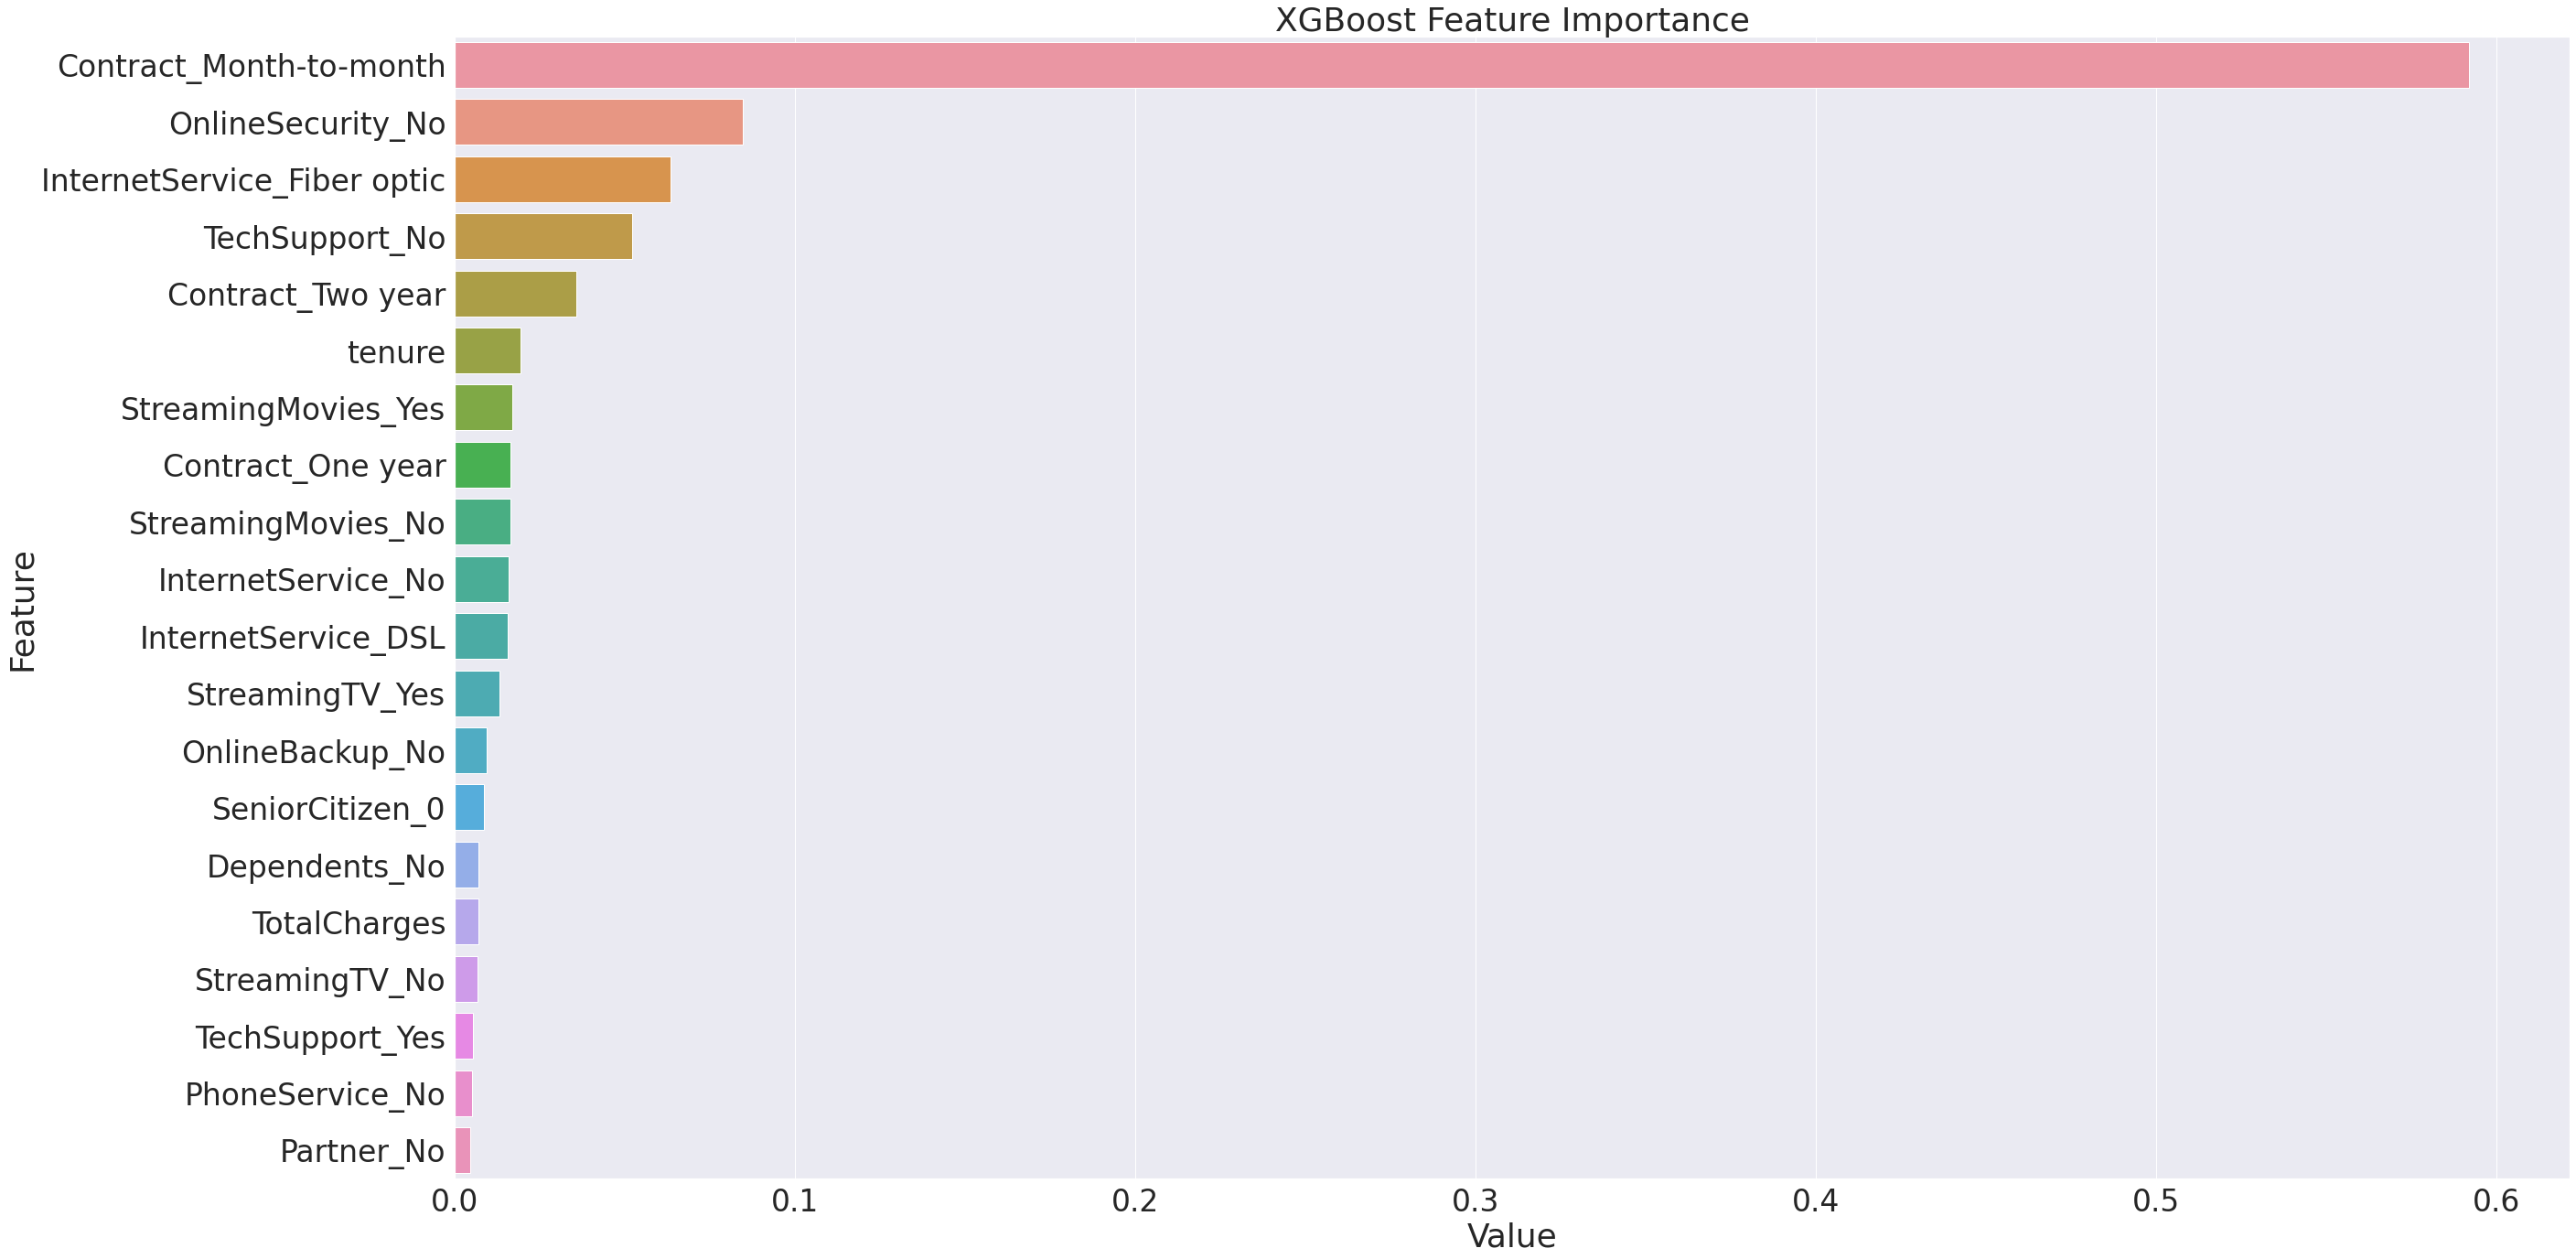

In [31]:
plotImp(model, feature_names)

In [32]:
joblib.dump(pipeline_xgb, 'model.joblib')

['model.joblib']

In [33]:
model = joblib.load("./model.joblib")

In [34]:
instance = ["7317-GGVPB", "Male", 0, "Yes", "No", 71, "Yes", "Yes", "Fiber optic", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Two year", "Yes", "Credit card (automatic)", 108.6, "7690.9"]
_COLUMN_NAMES=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [35]:
runtime_ppred = pd.DataFrame(data=[instance], columns=_COLUMN_NAMES)

In [36]:
model.predict(runtime_ppred)

array(['No'], dtype=object)